In [1]:
import pandas as pd
import numpy as np
import os
import re
import time
import datetime
import gc
import string
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from decimal import Decimal, getcontext

In [2]:
def obtener_columnas_object(dataframe):
    columnas_object = []
    tipos_datos = dataframe.dtypes
    for columna, tipo in tipos_datos.items():
        if tipo == 'object':
            columnas_object.append(columna)
    return columnas_object


In [3]:
import csv

def create_csv_file(data_name, out_dir, columns):
    file_name = f"{data_name}.csv"
    file_path = os.path.join(out_dir, file_name)
    
    # columns = ['Step', 'Particle', 'X_Pos', 'Y_Pos', 'Vel_X', 'Vel_Y', 'Vel_M', 'Force_X', 'Force_Y', 'Force_T', 'Ke_Energy']
    
    with open(file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(columns)

def add_data_to_csv(path, data):
    with open(path, 'a', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(data)

def add_long_lists_to_csv(path, column_indices, lists):
    rows = zip(*lists)  # Transpose lists to create rows
    
    with open(path, 'a', newline='') as csv_file:
        writer = csv.writer(csv_file)
        
        for row in rows:
            data = [''] * len(column_indices)  # Create empty data list
            
            for i, value in zip(column_indices, row):
                if isinstance(value, float):
                    formatted_value = "{:.9f}".format(value)
                    data[i] = formatted_value.replace('.', ',')
                else:
                    data[i] = value
            
            writer.writerow(data)

In [5]:
output_dir = r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok"
Sys_data_name = 'System_Energy'
csv_file_path = f"{output_dir}/{Sys_data_name}.csv"

Columnas = ['Temperature', 'Pot_E','Ke_E','Total_E']

create_csv_file(Sys_data_name, output_dir, Columnas)

Archivos = [r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\1. T_0.03\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\2. T_0.06\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\3. T_0.09\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\4 T_0.12\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\5. T_0.15\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\6. T_0.18\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\7. T_0.21\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\8. T_0.24\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\9. T_0.27\System_Data.csv",
            r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\10. T_0.3\System_Data.csv"]


for System1_Data_File in Archivos:
    # System1_Data_File = r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\1. T_0.03\System_Data.csv"
    System1_DF = pd.read_csv(System1_Data_File)

    columns_to_convert = obtener_columnas_object(System1_DF)
    System1_DF[columns_to_convert] = System1_DF[columns_to_convert].replace(',', '.', regex=True)
    System1_DF[columns_to_convert] = System1_DF[columns_to_convert].astype(float)

    Sys1_Label = System1_DF['Temp_Tar'].mean()
    Sys1_Pot_mean = System1_DF['Pot_Energy'].mean()
    Sys1_Ke_mean =  System1_DF['Ke_T'].mean()
    Sys1_Total_E =  Sys1_Pot_mean + Sys1_Ke_mean 

    add_data_to_csv(csv_file_path,[Sys1_Label,Sys1_Pot_mean,Sys1_Ke_mean,Sys1_Total_E])


del System1_Data_File

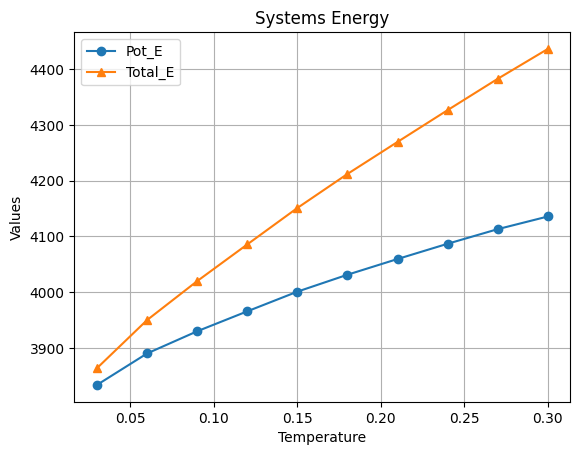

In [11]:
particle_data_file = os.path.join(output_dir, "System_Energy.csv")
SimulationsE_DF = pd.read_csv(particle_data_file)


# Graficar las tres columnas vs Temperatura en una misma gráfica
# plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Graficar las columnas y agregar etiquetas
plt.plot(SimulationsE_DF['Temperature'], SimulationsE_DF['Pot_E'], label='Pot_E', marker='o')
# plt.plot(SimulationsE_DF['Temperature'], SimulationsE_DF['Ke_E'], label='Ke_E', marker='s')
plt.plot(SimulationsE_DF['Temperature'], SimulationsE_DF['Total_E'], label='Total_E', marker='^')

# Configurar etiquetas de los ejes y el título
plt.xlabel('Temperature')
plt.ylabel('Values')
plt.title('Systems Energy')

# Agregar una leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.savefig(os.path.join(output_dir, "Systems_Energy.png"))
# plt.show()